# 1. Import the basics, the data, and have a look

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [523]:
df = pd.read_csv('kc_house_data.csv')

In [524]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Get rid of some of the unused variables

In [525]:
df = df[["date", "price", "sqft_living", "zipcode", "sqft_lot", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"]]

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
date             21597 non-null object
price            21597 non-null float64
sqft_living      21597 non-null int64
zipcode          21597 non-null int64
sqft_lot         21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.5+ MB


# 3. For the independent variable we're working with (renovated), what kind of null/empty values are we looking at

In [527]:
len(df[df["yr_renovated"].isna() | df["yr_renovated"] == 0]["yr_renovated"])

17011

# 4. Have a look at the data distribution

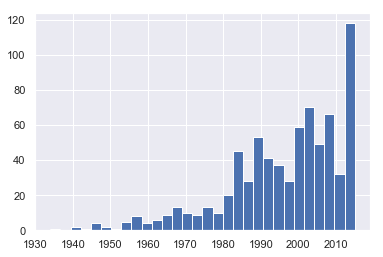

In [528]:
(n, bins, patches) = plt.hist(df[df["yr_renovated"] > 0]["yr_renovated"], bins=30)

In [529]:
bins[-2:-1]

array([2012.3])

In [530]:
bins[-7:-6]

array([1998.8])

# Creating new variable based on newness

In [531]:
df["blt_or_renov"] = df["yr_renovated"]

In [532]:
df.loc[df[df["blt_or_renov"] == 0].index, "blt_or_renov"] = df[df["blt_or_renov"] ==0]["yr_built"]

In [533]:
df["blt_or_renov"].fillna(value=df["yr_built"], inplace=True)

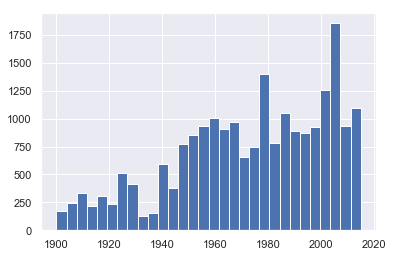

In [534]:
df["blt_or_renov"].hist(bins=30)

In [535]:
df.head()

,date,price,sqft_living,zipcode,sqft_lot,yr_built,yr_renovated,sqft_living15,sqft_lot15,blt_or_renov
0,10/13/2014,221900.0,1180,98178,5650,1955,0.0,1340,5650,1955.0
1,12/9/2014,538000.0,2570,98125,7242,1951,1991.0,1690,7639,1991.0
2,2/25/2015,180000.0,770,98028,10000,1933,NaN,2720,8062,1933.0
3,12/9/2014,604000.0,1960,98136,5000,1965,0.0,1360,5000,1965.0
4,2/18/2015,510000.0,1680,98074,8080,1987,0.0,1800,7503,1987.0


In [536]:
df["price_per_sqft"] = df["price"]/df["sqft_living"]
df_filter = df[df["price_per_sqft"] > 0]

In [538]:
from statsmodels.formula.api import ols
model = ols(formula="blt_or_renov~price_per_sqft", data=df_filter).fit()

In [540]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           blt_or_renov   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1505.
Date:                Mon, 06 May 2019   Prob (F-statistic):          2.12e-318
Time:                        17:58:46   Log-Likelihood:            -1.0260e+05
No. Observations:               21597   AIC:                         2.052e+05
Df Residuals:                   21595   BIC:                         2.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1990.6887      0.495   4018.473      0.000    1989.718    1991.660
price_per_sqft    -0.0672      0.002    -38.799      0.000      -0.071      -0.064
==============================================================================
Omnibus:                      878.681   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              687.553
Skew:                          -0.352   Prob(JB):                    5.01e-150
Kurtosis:                       2.481   Cond. No.                         744.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

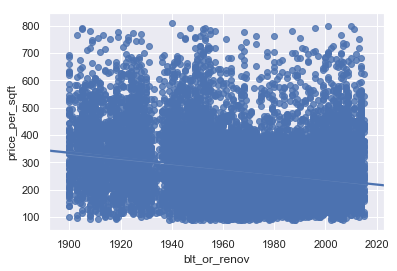

In [541]:
sns.regplot("blt_or_renov","price_per_sqft", data=df)

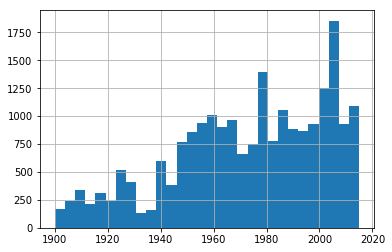

In [306]:
df["blt_or_renov"].hist(bins=30)

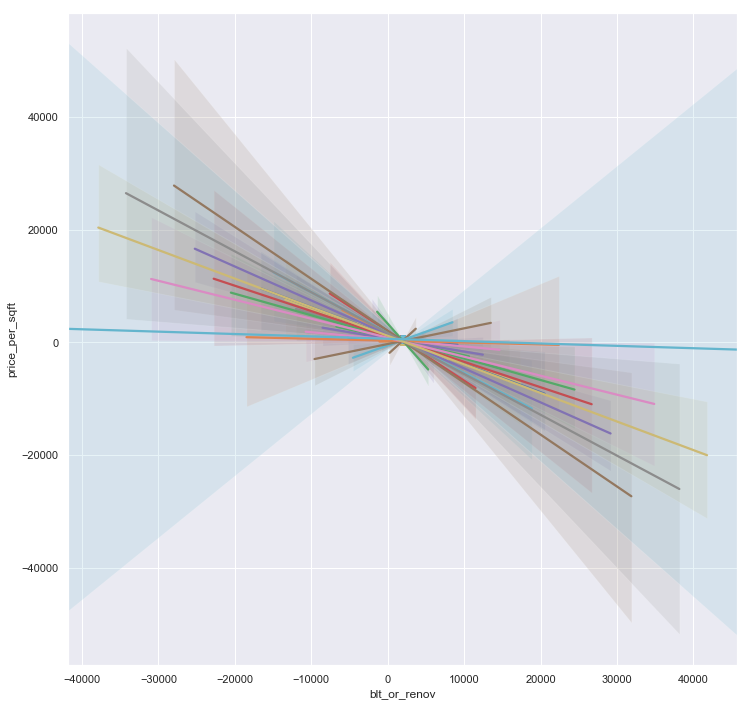

In [450]:
rsquared = {}
slopes = {}

sns.set(rc={'figure.figsize':(12,12)})
for zipcode in df["zipcode"].unique():
    df_filter = df[df["zipcode"] == zipcode]
    model = ols(formula="blt_or_renov~price_per_sqft", data=df_filter).fit()
    sns.regplot("blt_or_renov","price_per_sqft", data=df_filter, label=zipcode)
    rsquared[zipcode] = model.rsquared
    slopes[zipcode] = model.params[1]


In [412]:
list(rsquared.keys())[list(rsquared.values()).index(max(rsquared.values()))]

98019

In [421]:
sorted(rsquared.items(),key=lambda x:x[1])[-5:]

[(98103, 0.0794811854017542),
 (98126, 0.09163672084252017),
 (98108, 0.10002277396612536),
 (98042, 0.10774784822219807),
 (98019, 0.11908482423845401)]

In [451]:
sorted(slopes.items(),key=lambda x:x[1])[-5:]

[(98144, 0.01564492517465199),
 (98027, 0.017174855481564277),
 (98029, 0.025901138613651176),
 (98008, 0.026832832465707113),
 (98102, 0.0960931226254016)]

In [414]:
df[df["zipcode"] == 98019].head()

,date,price,sqft_living,zipcode,sqft_lot,yr_built,yr_renovated,sqft_living15,sqft_lot15,blt_or_renov,price_per_sqft
16,7/31/2014,395000.0,1890,98019,14040,1994,0.0,1890,14018,1994.0,208.994709
45,7/18/2014,488000.0,3160,98019,13603,2003,NaN,3050,9232,2003.0,154.430380
382,3/13/2015,389000.0,2130,98019,5337,2001,NaN,2300,6930,2001.0,182.629108
392,6/18/2014,330000.0,1600,98019,26977,2005,0.0,1790,27743,2005.0,206.250000
418,12/23/2014,355000.0,1860,98019,5028,2012,0.0,2320,5465,2012.0,190.860215


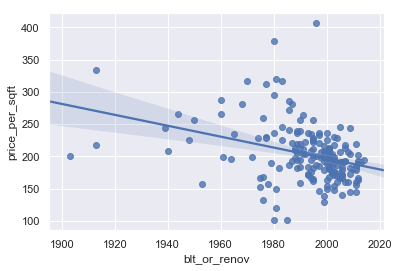

In [542]:
sns.regplot("blt_or_renov","price_per_sqft", data=df[df["zipcode"] == 98019], label=zipcode)

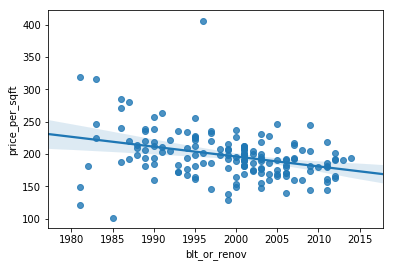

In [416]:
sns.regplot("blt_or_renov","price_per_sqft", data=df[(df["zipcode"] == 98019) & (df["blt_or_renov"] >1980)], label=zipcode)

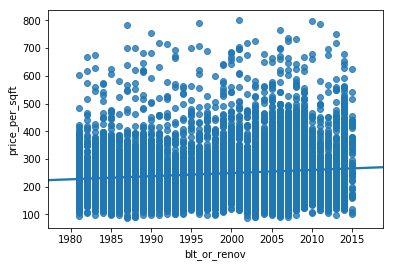

In [417]:
sns.regplot("blt_or_renov","price_per_sqft", data=df[(df["blt_or_renov"] >1980)], label=zipcode)

In [442]:
df_98042 = df[(df["zipcode"] == 98042)]


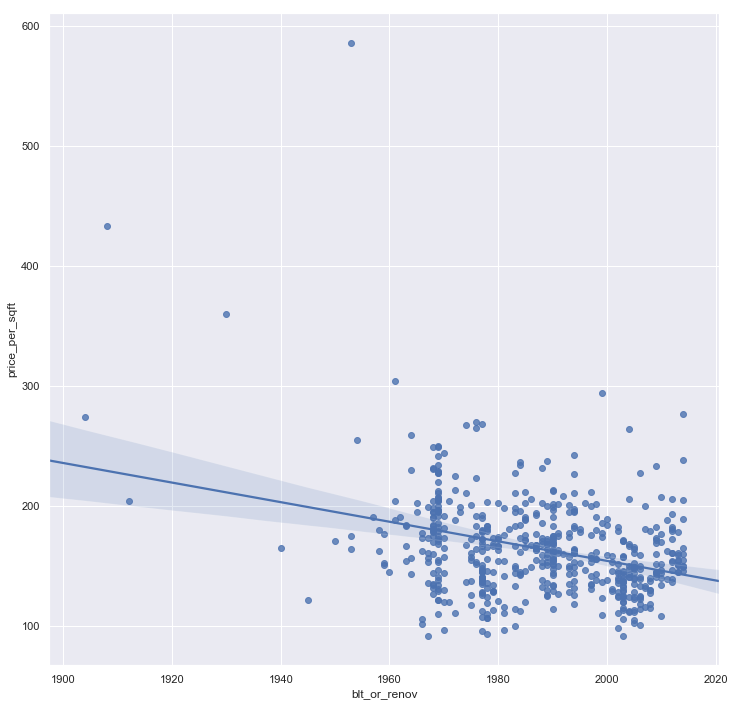

In [443]:
sns.regplot("blt_or_renov","price_per_sqft", data=df_98042, label=zipcode)

In [543]:
df_98042_1960 = df_98042[df_98042["blt_or_renov"] > 1960]

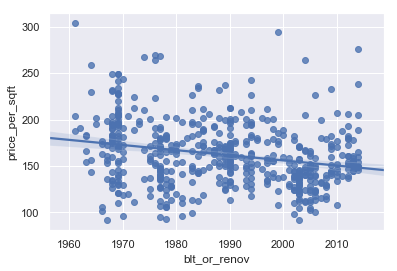

In [546]:
sns.regplot("blt_or_renov","price_per_sqft", data=df_98042_1960, label=zipcode)

In [544]:
from statsmodels.formula.api import ols
model = ols(formula="blt_or_renov~price_per_sqft", data=df_98042_1960).fit()


In [545]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           blt_or_renov   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     30.73
Date:                Mon, 06 May 2019   Prob (F-statistic):           4.68e-08
Time:                        18:00:00   Log-Likelihood:                -2161.7
No. Observations:                 529   AIC:                             4327.
Df Residuals:                     527   BIC:                             4336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2004.8103      2.990    670.574      0.000    1998.937    2010.683
price_per_sqft    -0.0999      0.018     -5.544      0.000      -0.135      -0.064
==============================================================================
Omnibus:                      121.976   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.423
Skew:                           0.047   Prob(JB):                     8.20e-06
Kurtosis:                       1.973   Cond. No.                         791.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

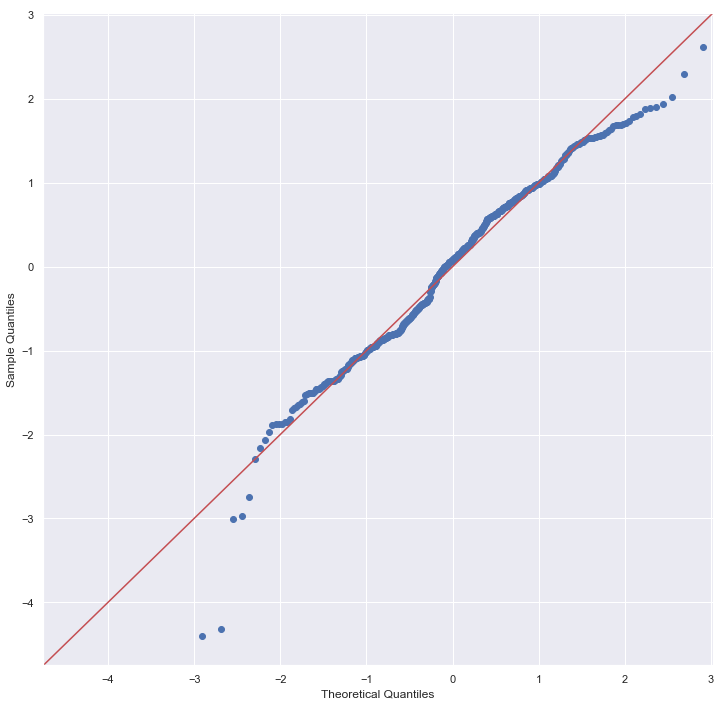

In [448]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


In [445]:

model = ols(formula="blt_or_renov~price_per_sqft", data=df_98042_1960).fit()



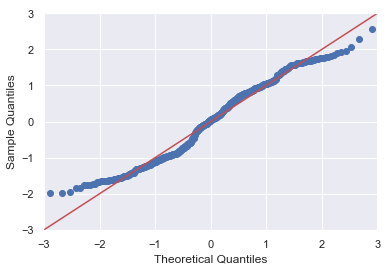

In [551]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [548]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [549]:
kf = KFold(n_splits=5)
temp =df[(df["zipcode"] == 98019) & (df["blt_or_renov"] >1980)]
X = temp["blt_or_renov"].reset_index(drop=True)
y = temp["price_per_sqft"].reset_index(drop=True)

X = sm.add_constant(X)


/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


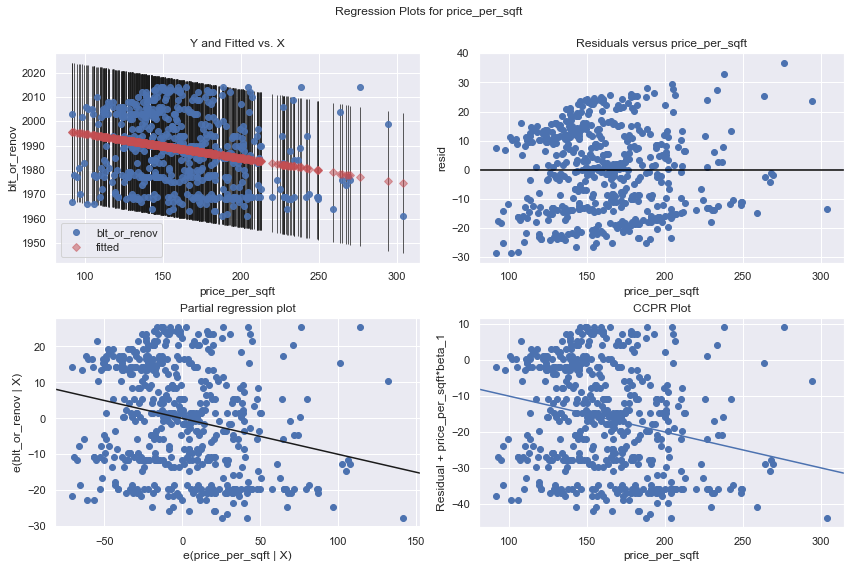

In [547]:

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "price_per_sqft", fig=fig)

In [550]:

for train_index, test_index in kf.split(X):
    x_train = X.loc[train_index]
    y_train = y.loc[train_index]
    linreg = LinearRegression()
    reg = linreg.fit(x_train,y_train )
    calc_ys = reg.intercept_ + (reg.coef_ * X.loc[test_index])
    print(cross_val_score(reg, X.loc[test_index], y.loc[test_index]).mean())


-0.3278065056594795
-0.022981908918209875
-0.14526631097037068
-0.2930006809625136
0.03018806749733856


/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should 

In [492]:
X.loc[[  0,   1,   2,   3]]

,const,blt_or_renov
0,1.0,2008.0
1,1.0,2003.0
2,1.0,1968.0
3,1.0,1965.0
